In [1]:
from keras.datasets import mnist

(X_train,_),(X_test,_) = mnist.load_data()

In [2]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [3]:
X_train = X_train/255.
X_test = X_test/255.

X_train = X_train.reshape(60000, 28*28)
X_test = X_test.reshape(10000, 28*28)

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [6]:
encoding_dim = 32

In [7]:
from keras import layers

input_img = layers.Input(shape=(784,))

encoded = layers.Dense(256, activation='elu')(input_img)
encoded = layers.Dense(128, activation='elu')(encoded)
encoded = layers.Dense(encoding_dim, activation='elu')(encoded)

decoded = layers.Dense(128, activation='elu')(encoded)
decoded = layers.Dense(256, activation='elu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

In [12]:
from keras import models

autoencoder = models.Model(input_img, decoded, name='autoencoder')
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_5 (Dense)              (None, 128)               4224      
_________________________________________________________________
dense_6 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_7 (Dense)              (None, 784)               

In [11]:
encoder = models.Model(name='encoder',inputs=input_img, outputs=encoded)
encoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 32)                4128      
Total params: 237,984
Trainable params: 237,984
Non-trainable params: 0
_________________________________________________________________


In [14]:
encoded_input = layers.Input(shape=(encoding_dim,))

decoder_layer = autoencoder.layers[-3](encoded_input)
decoder_layer = autoencoder.layers[-2](decoder_layer)
decoder_layer = autoencoder.layers[-1](decoder_layer)

decoder = models.Model(encoded_input, decoder_layer, name='decoder')
decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 32)]              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               4224      
_________________________________________________________________
dense_6 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_7 (Dense)              (None, 784)               201488    
Total params: 238,736
Trainable params: 238,736
Non-trainable params: 0
_________________________________________________________________


In [15]:
%%time
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')
Hist = autoencoder.fit(X_train, X_train, epochs=50, batch_size=256, validation_data=(X_test, X_test))

Epoch 1/50
235/235 [==============================] - 2s 5ms/step - loss: 0.2807 - val_loss: 0.1397
Epoch 2/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1349 - val_loss: 0.1195
Epoch 3/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1172 - val_loss: 0.1085
Epoch 4/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1086 - val_loss: 0.1040
Epoch 5/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1041 - val_loss: 0.1006
Epoch 6/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1010 - val_loss: 0.0984
Epoch 7/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0985 - val_loss: 0.0964
Epoch 8/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0968 - val_loss: 0.0950
Epoch 9/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0955 - val_loss: 0.0939
Epoch 10/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0940 - val_loss: 0.0925

In [16]:
encoded_imgs = encoder.predict(X_test)
encoded_imgs.shape

(10000, 32)

In [17]:
decoded_imgs = decoder.predict(encoded_imgs)
decoded_imgs.shape
                            

(10000, 784)

In [18]:
autoencoded_imgs = autoencoder.predict(X_test)
autoencoded_imgs.shape

(10000, 784)

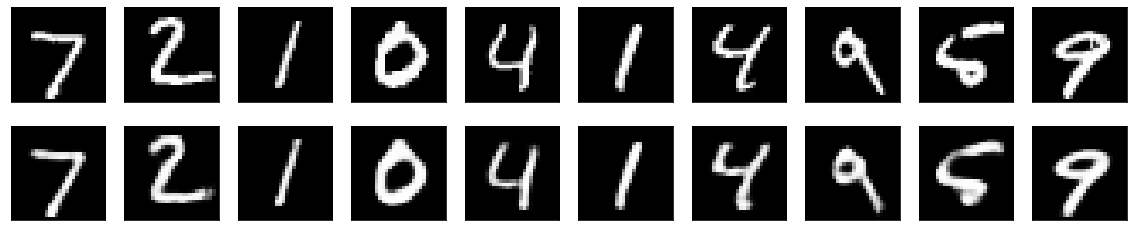

In [20]:
import matplotlib.pyplot as plt


plt.figure(figsize=(20,4))

for i in range(10):
    ax = plt.subplot(2, 10, i+1)
    plt.imshow(X_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, 10, i+10+1)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()